In [28]:
#importing the libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Setting the size of the plots (10 inches width and 10 inches height)
plt.rcParams['figure.figsize']=(10.0,10.0)
#loading the data
data=pd.read_csv('Salary_Data.csv')
X=data.iloc[:,0]
y=data.iloc[:,1]
#Removing rows and colums with missing values
data=data.dropna()
data=data.dropna(axis=1)
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [30]:
#Normalizing the data
#(As YearsExperience and Salary rate have different scales)
X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std
print(X_mean,y_mean)
print(X_std,y_std)

5.3133333333333335 76003.0
2.790189161249745 26953.65024877583


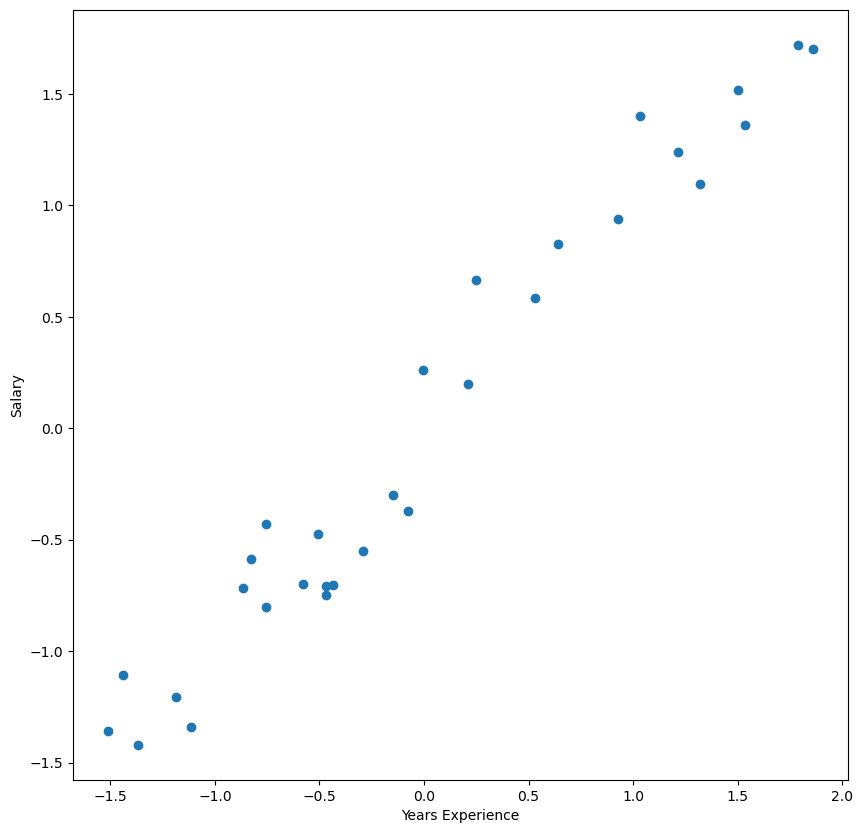

In [11]:
#Plotting the normalized data
plt.scatter(X,y)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [32]:
#Initializing parameters (slope,intercept,Learning Rate,Number of iterations)
m = 0
c = 0  
L = 0.01  
epochs = 5000  
n = float(len(y))

#Finding gradient descent(to help us minimize Mean squared error)
for i in range(epochs):
    y_predicted = m * X + c  # Predicted y values
    m_g = (-2/n) * sum(X *(y - y_predicted))  
    c_g = (-2 / n) *sum(y - y_predicted)  
    m = m - L * m_g  # values of m and c
    c = c - L * c_g  


#Actual values of m and c (Denormalization)
m_actual = m *(y_std / X_std)
c_actual = c *y_std + y_mean - m_actual * X_mean
print(f'Actual Slope:{m_actual} and the actual intercept:{c_actual}')

Actual Slope:9449.96232145505 and the actual intercept:25792.200198668834


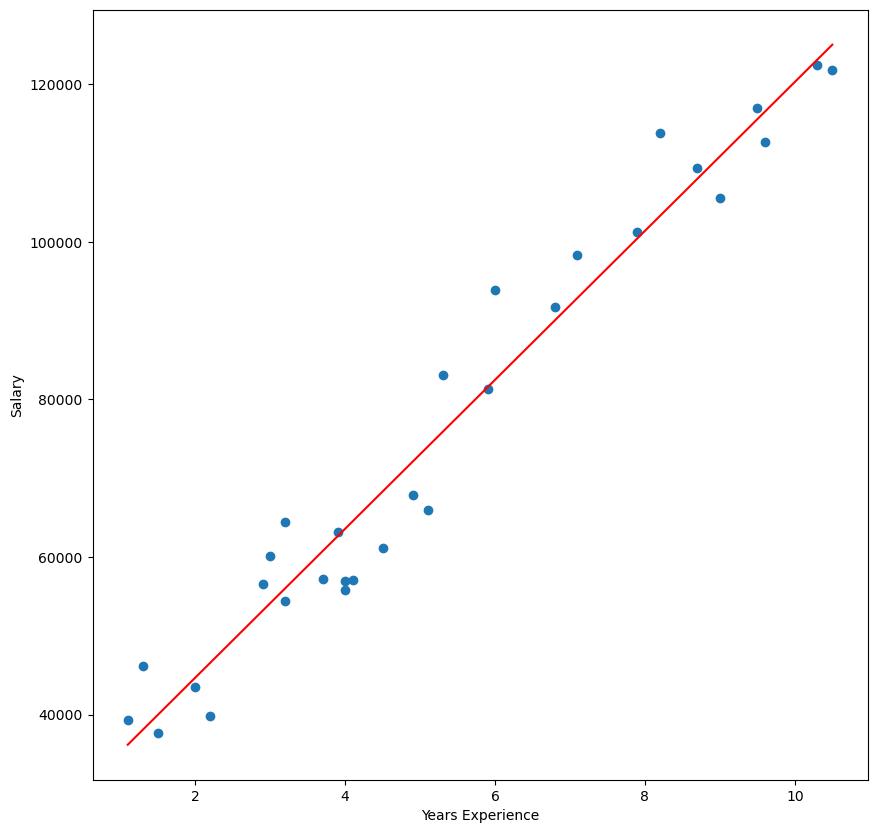

In [35]:
#Plotting the regression line
plt.scatter(data.iloc[:,0],data.iloc[:,1]) #Plotting actual values in scatter plot
plt.plot([min(data.iloc[:,0]),max(data.iloc[:,0])],[m_actual*min(data.iloc[:,0])+c_actual,m_actual*max(data.iloc[:,0])+c_actual],color='red')
#Plotting the minimum and maximum values of x with their respective y values (y=m*x+c)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [47]:
#Function for finding MSE(Mean Squared Error)
def MSE(m,c,X,y):
    error=0
    for i in range(len(data)):
        X=data.iloc[:,0]
        y=data.iloc[:,1]
        error+=(y-(m*X+c))**2
    mse=error.mean()
    return mse

In [49]:
#Function for calculating root mean squared error
def RMSE(m, c, X, y):
    y_predicted = m * X + c 
    error = (y - y_predicted) ** 2  
    rmse = np.sqrt(np.mean(error)) 
    return rmse